## Overview Exercises

#### 1. Has the network latency gone up since we switched internet service providers?

$H_{0}$ The network latency is not greater on average since we switched ISPs.

$H_{a}$ The network latency is greater on average since we switched ISPs

Type I Error (False Positive) = We find that the Network latency is greater on average since switching ISPs, when in reality it is not greater on average.

Type II Error (False Negative) = We find that the Network latency is NOT greater on average since switching ISPs, when in reality it is greater on average.


#### 2. Is the website redesign any good?

$H_{0}$ The majority of users (greater than 50%) have no preference between the new and old website designs or they prefer the old website.

$H_{a}$ The majority of users (greather than 50%) prefer the new website design over the old website design.

Type I Error (False Positive) = We find that the majority of users prefer the new website design, when in reality most users have no preference between the two designs or they prefer the old website.

Type II Error (False Negative) = We find the majority of users have no preference between the new and old website designs or they prefer the old website, when in fact they prefer the new website design.

#### 3. Is our television ad driving more sales?

$H_{0}$ Since introducing our television ad less than 10% of customers were influenced by the ad to shop with us.

$H_{a}$ Since introducing our television ad 10% or more of customers were influenced by the ad to shop with us.

Type I Error (False Positive) = We find that since introducing our television ad 10% or more of customers were influenced by the ad to shop with us, when in fact less than 10% of customers were influenced by the ad to shop with us.

Type II Error (False Negative) = We find that since introducing our television ad less than 10% of customers were influenced by the ad to shop with us, when in fact 10% or more of customers were influenced by the ad to shop with us.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## T-test exercises

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A  sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50  sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of  significance.

In [14]:
alpha = .05
#office1 
mean1 = 90
sd1 = 15
ssize1 = 40

# office2
mean2 = 100
sd2 = 20
ssize2 = 50

$H_{0}$ = There is no difference in time to sell a house for office #1 when compared to office #2

$H_{a}$ = There is a difference in time to sell a house for office #1 when compared to office #2

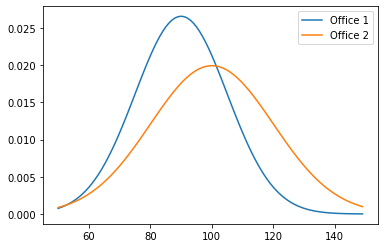

In [135]:
x = np.arange(50, 150)

y1 = stats.norm(mean1, sd1).pdf(x)
y2 = stats.norm(mean2, sd2).pdf(x)
plt.plot(x,y1, label = 'Office 1')
plt.plot(x,y2, label = 'Office 2')
plt.legend()

In [139]:
t, p = stats.ttest_ind_from_stats(mean1, sd1, ssize1, mean2, sd2, ssize2, equal_var=False)
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [11]:
p < alpha

True

#### I am 95% confident that there is a difference between the time it takes to sell a house for office #1 when compared to office #2.  Further, office #1 takes less time than office #2 to do so.

#### 2. Load the mpg dataset and use it to answer the following questions:


In [27]:
from pydataset import data
mpg = data('mpg')

In [29]:
mpg.info()
mpg.year.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


1999    117
2008    117
Name: year, dtype: int64

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [156]:
mpg['total_mpg'] = stats.hmean(mpg[['hwy', 'cty']], axis=1)

In [151]:
mpg2008 = mpg[mpg.year == 2008].total_mpg

mpg1999 = mpg[mpg.year == 1999].total_mpg


<AxesSubplot:>

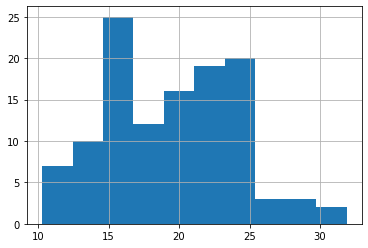

In [152]:
mpg2008.hist()

<AxesSubplot:>

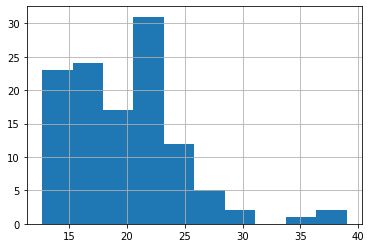

In [153]:
mpg1999.hist()

In [159]:
mpg2008.count(), mpg1999.count() #Normality not an issue due to sample sizes

(117, 117)

In [154]:
mpg2008.var(), mpg1999.var() # Variance is relatively similar

(22.550836772260343, 25.850396545865912)

In [160]:
#Levenes test
stats.levene(mpg2008, mpg1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

**Hypothesis**

$H_{0}$: There is no difference in avg fuel efficiency for vehicles from 2008 and 1999.

$H_{a}$: There is a difference in avg fuel efficiency for vehicles from 2008 and 1999.


**Significance Level**

$\alpha$ = 0.05


In [157]:
t, p = stats.ttest_ind(mpg2008, mpg1999, equal_var= True)

t, p, alpha

(-0.3011962975077886, 0.7635345888327115, 0.05)

In [158]:
p < alpha

False

##### I cannot reject the null hypothesis that there is no difference in fuel efficiency for vehicles from 2008 and 1999.

#### Are compact cars more fuel-efficient than the average car?

23.500416808701296

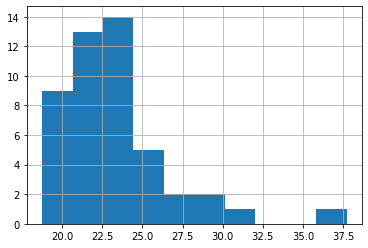

In [179]:
compact_mpg = mpg[mpg['class'] == 'compact'].total_mpg

compact_mpg.hist()
compact_mpg.mean()

19.585525317633177

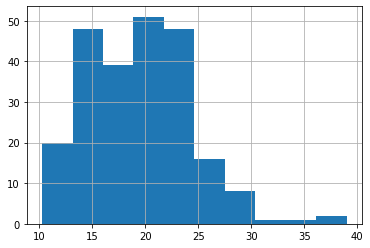

In [181]:
all_cars_mpg = mpg.total_mpg
all_cars_mpg.hist()
all_cars_mpg.mean()

In [163]:
compact_mpg.var(), all_cars_mpg.var()

(12.763933193960233, 24.106173930122633)

**Hypothesis**

$H_{0}$: There is no difference in avg fuel efficiency for compacts when compared to the average car.

$H_{a}$: There is a difference in avg fuel efficiency for compacts when compared to the average car.


**Significance Level**

$\alpha$ = 0.05

In [166]:
# t, p = stats.ttest_ind(compact_mpg, all_cars_mpg, equal_var= True)  This one is applicable here because we're only 
# looking at one subset (one sample) in comparison to a theoretical (or in this case actual) population mean.
t, p = stats.ttest_1samp(compact_mpg, all_cars_mpg.mean())
t, p, alpha

(7.512360093161354, 1.5617666348807727e-09, 0.05)

In [167]:
p < alpha

True

#### I am 95% confident that there is a difference between the avg car's mpg and compact car's mpg. Further, the compact car's mpg is greater than the avg car's mpg.

#### Do manual cars get better gas mileage than automatic cars?

In [168]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total_mpg,is_manual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,False


In [169]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [183]:
#Alternate code to get the same info: mpg["is_manual"] = mpg.trans.isin(['manual(m6)', 'manual(m5)'])
mpg["is_manual"] = mpg.trans.str.contains('manual')

In [185]:
manual_mpg = mpg[mpg.is_manual == True].total_mpg

auto_mpg = mpg[mpg.is_manual == False].total_mpg

manual_mpg.head(), auto_mpg.head()

(2     24.360000
 3     24.313725
 6     21.272727
 8     21.272727
 10    23.333333
 Name: total_mpg, dtype: float64,
 1    22.212766
 4    24.705882
 5    19.809524
 7    21.600000
 9    19.512195
 Name: total_mpg, dtype: float64)

<AxesSubplot:>

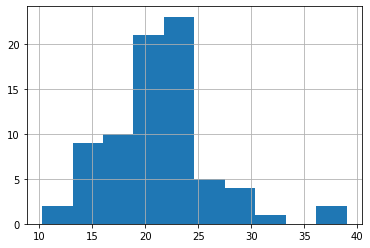

In [186]:
manual_mpg.hist()

<AxesSubplot:>

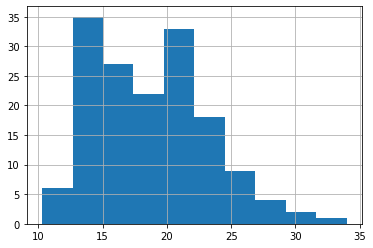

In [187]:
auto_mpg.hist()

In [188]:
manual_mpg.var(), auto_mpg.var()

(25.665633639828275, 20.428279095002054)

In [189]:
stats.levene(manual_mpg, auto_mpg)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

**Hypothesis**

$H_{0}$: There is no difference in avg fuel efficiency for manual and automatic cars.

$H_{a}$: There is a difference in avg fuel efficiency for manual and automatic cars.

**Significance Level**

$\alpha$ = 0.05

In [177]:
t, p = stats.ttest_ind(manual_mpg, auto_mpg, equal_var= True)

t, p, alpha

(4.652577547151351, 5.510464610044005e-06, 0.05)

In [178]:
p < alpha

True

<AxesSubplot:>

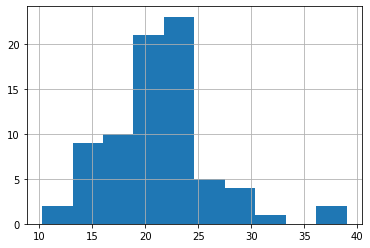

#### I am 95% confident that there is a difference between manual car's mpg and automatic car's mpg. Further, the manual car's mpg is greater than the automatic car's mpg.